In [1]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

 ·············


In [2]:
import sqlutilpy
dataEW = pd.DataFrame(
         sqlutilpy.get('''
         select * from jason_sanders.virac2_variables where prob>0.8 and class='EW' ''',
                    **config.wsdb_kwargs)
       )

# dataEW = pd.DataFrame(
#          sqlutilpy.get('''
#          with p as (select * from thomas_molnar.virac2_variable_sources_eaeb where prob>0.9 and class='EW')
#          select p.*,v.ra,v.dec,v.l,v.b,v.j_ivw_mean_mag,v.h_ivw_mean_mag,v.ks_ivw_mean_mag 
#          from p inner join thomas_molnar.virac2_variable_data as v on p.sourceid=v.sourceid''',
#                     **config.wsdb_kwargs)
#        )
# def period_fix(var_in,tol=1.):

#     period_out = var_in['lsq_period'].values.copy()

#     period_out[((var_in['class']=='EA/EB')|(var_in['class']=='Ell'))&
#                 (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
#     ss=np.argmax([var_in['amp_0'].values,
#                   var_in['amp_1'].values,
#                   var_in['amp_2'].values,
#                   var_in['amp_3'].values],axis=0)
#     fltr = ~((var_in['class']=='EA/EB')|(var_in['class']=='Ell'))
#     period_out[fltr]/=(1.+ss)[fltr]
    
#     period_out[var_in['class']=='EW']*=2
    
#     return period_out
    
# dataEW['period'] = period_fix(dataEW)

In [3]:
import sys
sys.path.append('../../../../')
from virac_utils import cm_gaia, cm_2mass

In [4]:
gg = cm_gaia(dataEW, cm_radius=0.5, use_pm=True, epoch=2014.0)

In [193]:
gg_TEST = cm_gaia(dataEW_TEST, cm_radius=0.5, use_pm=True, epoch=2014.0)

In [121]:
TM_TEST = cm_2mass(dataEW_TEST, radeccols=['ra','dec'], radius=0.2)

In [118]:
TM = cm_2mass(dataEW, radeccols=['ra','dec'], radius=0.2)

-0.03390026092529297


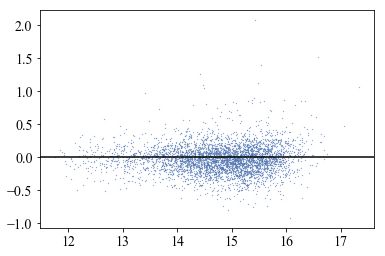

In [123]:
plt.plot(dataEW_TEST['j_ivw_mean_mag'],dataEW_TEST['j_ivw_mean_mag']-TM_TEST['j_m'],'.',ms=0.5)
# xx = np.linspace(12.,17.)
# plt.plot(xx,xx,lw=3)
plt.axhline(0.,color='k')
print(np.nanmedian(dataEW_TEST['j_ivw_mean_mag']-TM_TEST['j_m']))

0.06904983520507812


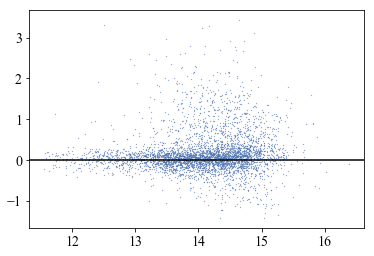

In [122]:
plt.plot(dataEW_TEST['ks_ivw_mean_mag'],dataEW_TEST['ks_ivw_mean_mag']-TM_TEST['k_m'],'.',ms=0.5)
# xx = np.linspace(12.,17.)
# plt.plot(xx,xx,lw=3)
plt.axhline(0.,color='k')
print(np.nanmedian(dataEW_TEST['ks_ivw_mean_mag']-TM_TEST['k_m']))

0.0118637085


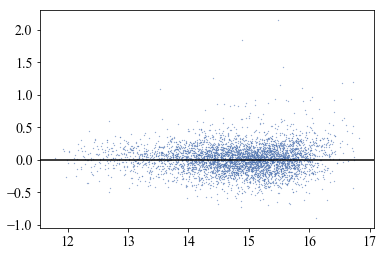

In [124]:
plt.plot(dataEW['j_ivw_mean_mag'],dataEW['j_ivw_mean_mag']-TM['j_m'],'.',ms=0.5)
# xx = np.linspace(12.,17.)
# plt.plot(xx,xx,lw=3)
plt.axhline(0.,color='k')
print(np.nanmedian(dataEW['j_ivw_mean_mag']-TM['j_m']))

0.10430384


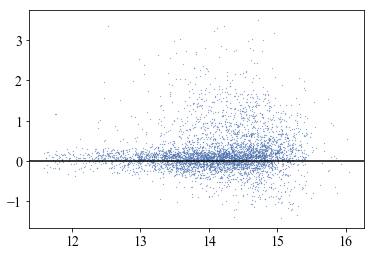

In [125]:
plt.plot(dataEW['ks_ivw_mean_mag'],dataEW['ks_ivw_mean_mag']-TM['k_m'],'.',ms=0.5)
# xx = np.linspace(12.,17.)
# plt.plot(xx,xx,lw=3)
plt.axhline(0.,color='k')
print(np.nanmedian(dataEW['ks_ivw_mean_mag']-TM['k_m']))

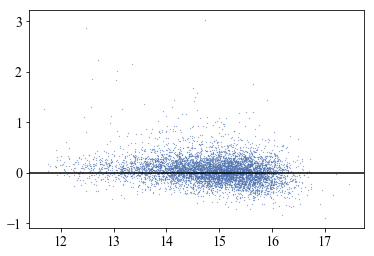

In [107]:
plt.plot(TM['j_m'],dataEW['j_ivw_mean_mag']-TM['j_m'],'.',ms=0.5)
# xx = np.linspace(12.,17.)
# plt.plot(xx,xx,lw=3)
plt.axhline(0.,color='k')

In [5]:
coeff=0.428#28
# coeff=0.443

shiftsJ, shiftsK = 0.036373138427734375, 0.04875659942626953

dist_ew = np.power(10.,0.2*(
    dataEW['ks_ivw_mean_mag']-coeff*(dataEW['j_ivw_mean_mag']- dataEW['ks_ivw_mean_mag'])
    +(5.94-coeff*(6.84-5.94))*np.log10(dataEW['period'])
    +(0.-coeff*(0.039-0.)))-2)

# dist_ew_TEST = np.power(10.,0.2*(
#     dataEW_TEST['ks_ivw_mean_mag']+shiftsK-coeff*(dataEW_TEST['j_ivw_mean_mag']- dataEW_TEST['ks_ivw_mean_mag'] + shiftsJ-shiftsK)
#     +(5.94-coeff*(6.84-5.94))*np.log10(period_fix(dataEW_TEST))
#     +(0.-coeff*(0.039-0.)))-2)

# dist_ew_TMASS = np.power(10.,0.2*(
#     TM['k_m']-coeff*(TM['j_m']- TM['k_m'])
#     +(5.95-coeff*(6.87-5.95))*np.log10(dataEW['period'])
#     +(0.-coeff*(0.04-0.)))-2)

# dist_ew_TEST_TMASS = np.power(10.,0.2*(
#     TM_TEST['k_m']-coeff*(TM_TEST['j_m']-TM_TEST['k_m'])
#     +(5.95-coeff*(6.87-5.95))*np.log10(period_fix(dataEW_TEST))
#     +(0.-coeff*(0.04-0.)))-2)

In [6]:
from zero_point import zpt
fltrG = (gg['astrometric_params_solved'].values>10.)&(gg['ruwe']<1.4)&(gg['astrometric_params_solved']==31)
fltrG &= (gg['phot_g_mean_mag']<21)&(((gg['nu_eff_used_in_astrometry']>1.1)&(gg['nu_eff_used_in_astrometry']<1.9))
                                     |((gg['pseudocolour']>1.24)&(gg['pseudocolour']<1.72)))
print(np.count_nonzero(fltrG))
# fltrG &= (dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))
zpt.load_tables()
shifts=zpt.get_zpt(gg['phot_g_mean_mag'].values[fltrG], 
            gg['nu_eff_used_in_astrometry'].values[fltrG], 
            gg['pseudocolour'].values[fltrG], 
            gg['ecl_lat'].values[fltrG], 
            gg['astrometric_params_solved'].values[fltrG])


11764


In [224]:
from zero_point import zpt
fltrG_TEST = (gg_TEST['astrometric_params_solved'].values>10.)&(gg_TEST['ruwe']<1.4)&(gg_TEST['astrometric_params_solved']==31)
fltrG_TEST &= (gg_TEST['phot_g_mean_mag']<21)&(((gg_TEST['nu_eff_used_in_astrometry']>1.1)&(gg_TEST['nu_eff_used_in_astrometry']<1.9))
                                     |((gg_TEST['pseudocolour']>1.24)&(gg_TEST['pseudocolour']<1.72)))
print(np.count_nonzero(fltrG_TEST))
# fltrG &= (dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))
zpt.load_tables()
shifts_TEST=zpt.get_zpt(gg_TEST['phot_g_mean_mag'].values[fltrG_TEST], 
            gg_TEST['nu_eff_used_in_astrometry'].values[fltrG_TEST], 
            gg_TEST['pseudocolour'].values[fltrG_TEST], 
            gg_TEST['ecl_lat'].values[fltrG_TEST], 
            gg_TEST['astrometric_params_solved'].values[fltrG_TEST])


4568


In [225]:
print(np.nanmedian(dataJ['ks_ivw_mean_mag_x']-dataJ['ks_ivw_mean_mag_y']))
print(np.nanmedian(dataJ['j_ivw_mean_mag_x']-dataJ['j_ivw_mean_mag_y']))

0.036373138427734375
0.04875659942626953


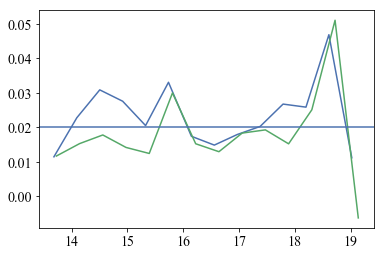

In [226]:
# col_norm(dataEW['ks_ivw_mean_mag'][fltrG],
#        gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG],range=[[11.5,17],[-1.,1]],bins=60
#          ,norm=LogNorm());
rr = running_median(gg_TEST['phot_g_mean_mag'][fltrG_TEST],gg_TEST['parallax'][fltrG_TEST]-shifts_TEST-1./dist_ew_TEST[fltrG_TEST])
plt.plot(rr[0],rr[1])
rr = running_median(gg['phot_g_mean_mag'][fltrG],gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG])
plt.plot(rr[0],rr[1])
plt.axhline(0.02)

In [7]:
from plotting_general import col_norm, running_median

In [8]:
import seaborn as sns

/data/jls/python3.5/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


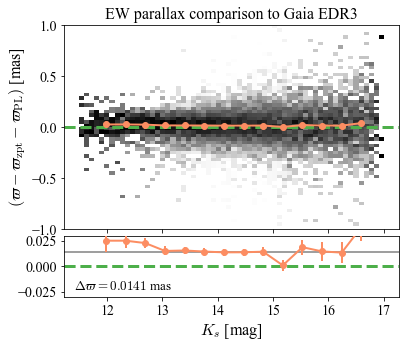

In [9]:
f,a=plt.subplots(2,1,sharex=True,figsize=[6.,5.],
                gridspec_kw={'height_ratios':[1.,0.3]})
plt.subplots_adjust(hspace=0.05)
plt.sca(a[0])
col_norm(dataEW['ks_ivw_mean_mag'][fltrG],
       gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG],range=[[11.5,17],[-1.,1]],bins=60
         ,norm=LogNorm());
rr = running_median(dataEW['ks_ivw_mean_mag'][fltrG],gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG])
plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
             ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10)
plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
# plt.xlabel(r'$K_s$ [mag]')
plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
plt.ylim(-1.,1.)

plt.sca(a[1])
rr = running_median(dataEW['ks_ivw_mean_mag'][fltrG],gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG])
plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
             ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10)
plt.axhline(np.nanmedian(gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG]),color='gray')
t=plt.annotate(r'$\Delta\varpi=%0.4f$ mas'%np.nanmedian(gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG]),
             fontsize=13,xy=(0.03,0.06),xycoords='axes fraction',
            ha='left',va='bottom',zorder=50)
plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
plt.xlabel(r'$K_s$ [mag]')
# plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
# plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
plt.ylim(-0.03,0.03)
# plt.ylim(-1.,1.)
t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})

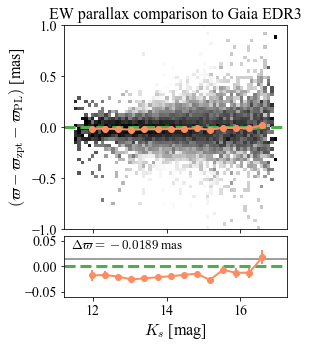

In [10]:
f,a=plt.subplots(2,1,sharex=True,figsize=[4.,5.],
                gridspec_kw={'height_ratios':[1.,0.3]})
plt.subplots_adjust(hspace=0.05)
plt.sca(a[0])
col_norm(dataEW['ks_ivw_mean_mag'][fltrG],
       gg['parallax'][fltrG]-0.*shifts-1./dist_ew[fltrG],range=[[11.5,17],[-1.,1]],bins=60
         ,norm=LogNorm());
rr = running_median(dataEW['ks_ivw_mean_mag'][fltrG],gg['parallax'][fltrG]-0.*shifts-1./dist_ew[fltrG])
plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
             ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10)
plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
# plt.xlabel(r'$K_s$ [mag]')
plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
plt.ylim(-1.,1.)

plt.sca(a[1])
rr = running_median(dataEW['ks_ivw_mean_mag'][fltrG],gg['parallax'][fltrG]-0.*shifts-1./dist_ew[fltrG])
plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
             ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10)
plt.axhline(np.nanmedian(gg['parallax'][fltrG]-shifts-1./dist_ew[fltrG]),color='gray')
t=plt.annotate(r'$\Delta\varpi=%0.4f$ mas'%np.nanmedian(gg['parallax'][fltrG]-0.*shifts-1./dist_ew[fltrG]),
             fontsize=13,xy=(0.03,0.94),xycoords='axes fraction',
            ha='left',va='top',zorder=50)
plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
plt.xlabel(r'$K_s$ [mag]')
# plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
# plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
plt.ylim(-0.06,0.06)
# plt.ylim(-1.,1.)
t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})

In [64]:
fltrG = (gg['astrometric_params_solved'].values>10.)&(gg['ruwe']<1.4)&(gg['astrometric_params_solved']==31)
fltrG &= (gg['phot_g_mean_mag']<21)&(((gg['nu_eff_used_in_astrometry']>1.1)&(gg['nu_eff_used_in_astrometry']<1.9))
                                     |((gg['pseudocolour']>1.24)&(gg['pseudocolour']<1.72)))
fltrG &= (np.log10(dataEW['period'])>-0.55)&(np.log10(dataEW['period'])<-0.25)&(dist_ew>0.2)&(dist_ew<10.)
print(np.count_nonzero(fltrG))
#     fltrG &= np.abs(wrap(dataEW['l']))<10.
# fltrG &= (dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))
zpt.load_tables()
shifts=zpt.get_zpt(gg['phot_g_mean_mag'].values[fltrG], 
            gg['nu_eff_used_in_astrometry'].values[fltrG], 
            gg['pseudocolour'].values[fltrG], 
            gg['ecl_lat'].values[fltrG], 
            gg['astrometric_params_solved'].values[fltrG])

print(np.nanmedian(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG]))
print(np.diff(np.nanpercentile(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG],[16.,84.]))*.5/np.sqrt(np.count_nonzero(fltrG))*np.sqrt(np.pi/2.))

print(np.nanmean(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG]))
print(np.std(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG])/np.sqrt(np.count_nonzero(fltrG)))

print(np.nanmedian(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG]))
print(np.diff(np.nanpercentile(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG],[16.,84.]))*.5/np.sqrt(np.count_nonzero(fltrG))*np.sqrt(np.pi/2.))

print(np.nanmean(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG]))
print(np.std(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG])/np.sqrt(np.count_nonzero(fltrG)))

9872
0.01058290550967017
[0.00154455]
0.007463741725149558
0.0016771026541252806
-0.022188923524873838
[0.00153948]
-0.023016670550296547
0.0016812424849664118


In [65]:
fltrG = (gg['astrometric_params_solved'].values>10.)&(gg['ruwe']<1.4)&(gg['astrometric_params_solved']==95)
fltrG &= (gg['phot_g_mean_mag']<21)&(((gg['nu_eff_used_in_astrometry']>1.1)&(gg['nu_eff_used_in_astrometry']<1.9))
                                     |((gg['pseudocolour']>1.24)&(gg['pseudocolour']<1.72)))
fltrG &= (np.log10(dataEW['period'])>-0.55)&(np.log10(dataEW['period'])<-0.25)&(dist_ew>0.2)&(dist_ew<10.)
print(np.count_nonzero(fltrG))

#     fltrG &= np.abs(wrap(dataEW['l']))<10.
# fltrG &= (dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))
zpt.load_tables()
shifts=zpt.get_zpt(gg['phot_g_mean_mag'].values[fltrG], 
            gg['nu_eff_used_in_astrometry'].values[fltrG], 
            gg['pseudocolour'].values[fltrG], 
            gg['ecl_lat'].values[fltrG], 
            gg['astrometric_params_solved'].values[fltrG])

print(np.nanmedian(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG]))
print(np.diff(np.nanpercentile(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG],[16.,84.]))*.5/np.sqrt(np.count_nonzero(fltrG))*np.sqrt(np.pi/2.))

print(np.nanmean(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG]))
print(np.std(gg['parallax'][fltrG]-True*shifts-1./dist_ew[fltrG])/np.sqrt(np.count_nonzero(fltrG)))

print(np.nanmedian(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG]))
print(np.diff(np.nanpercentile(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG],[16.,84.]))*.5/np.sqrt(np.count_nonzero(fltrG))*np.sqrt(np.pi/2.))

print(np.nanmean(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG]))
print(np.std(gg['parallax'][fltrG]-False*shifts-1./dist_ew[fltrG])/np.sqrt(np.count_nonzero(fltrG)))

23030
0.012544518794117804
[0.00329485]
0.01617216378386773
0.0046899591246208575
-0.010124484059329392
[0.00329514]
0.0007765572719292827
0.004689751371464439


In [66]:
def wrap(l):
    return l-360.*(l>180.)
def running_zeropoint(astParams=31,filtr='phot_g_mean_mag',w_corr=True,nperbin=400):
    from zero_point import zpt
    fltrG = (gg['astrometric_params_solved'].values>10.)&(gg['ruwe']<1.4)&(gg['astrometric_params_solved']==astParams)
    fltrG &= (gg['phot_g_mean_mag']<21)&(((gg['nu_eff_used_in_astrometry']>1.1)&(gg['nu_eff_used_in_astrometry']<1.9))
                                         |((gg['pseudocolour']>1.24)&(gg['pseudocolour']<1.72)))
    fltrG &= (np.log10(dataEW['period'])>-0.55)&(np.log10(dataEW['period'])<-0.25)&(dist_ew>0.2)&(dist_ew<10.)
#     fltrG &= np.abs(wrap(dataEW['l']))<10.
    # fltrG &= (dataEW['amp_double_3']<dataEW['amp_double_1']*(0.125+dataEW['amp_double_1']))
    zpt.load_tables()
    shifts=zpt.get_zpt(gg['phot_g_mean_mag'].values[fltrG], 
                gg['nu_eff_used_in_astrometry'].values[fltrG], 
                gg['pseudocolour'].values[fltrG], 
                gg['ecl_lat'].values[fltrG], 
                gg['astrometric_params_solved'].values[fltrG])

    return running_median(wrap(gg[filtr][fltrG]),
                          gg['parallax'][fltrG]-w_corr*shifts-1./dist_ew[fltrG],
                          equal_counts=True,
                          nbins=np.count_nonzero(fltrG)//nperbin)

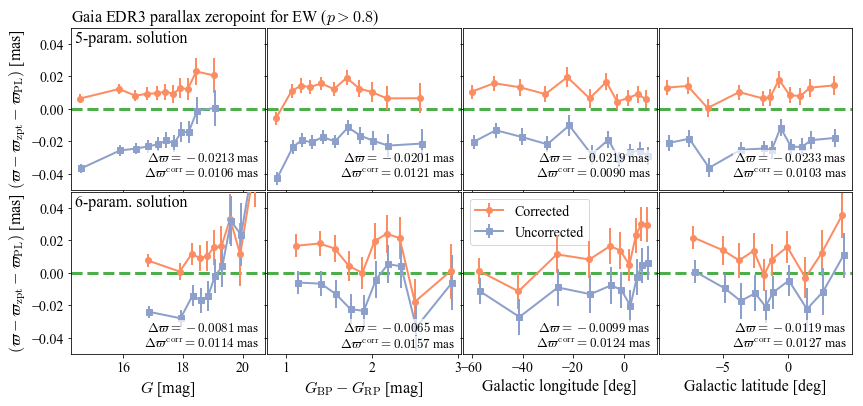

In [68]:
f,ax=plt.subplots(2,4,figsize=[14.,6.],sharex='col',sharey=True)
plt.subplots_adjust(wspace=0.01,hspace=0.01)
lbls = [r'$G$ [mag]',r'$G_\mathrm{BP}-G_\mathrm{RP}$ [mag]','Galactic longitude [deg]', 'Galactic latitude [deg]']
for ii, (bb,lbl) in enumerate(zip(['phot_g_mean_mag','bp_rp','l','b'],lbls)):
    a = ax[:,ii]
    plt.sca(a[0])
    rr = running_zeropoint(31,bb, True, nperbin=800)
    plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
                 ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10,label='Corrected')

    # plt.axhline(np.median(rr[1]),color='gray')
    t=plt.annotate(r'$\Delta\varpi^\mathrm{corr}=%0.4f$ mas'%np.nanmedian(rr[1]),
                 fontsize=13,xy=(0.97,0.06),xycoords='axes fraction',
                ha='right',va='bottom',zorder=50)
    t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})

    rr = running_zeropoint(31, bb, False, nperbin=800)
    plt.errorbar(rr[0]+np.median(np.diff(rr[0]))*0.1,rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
                 ,fmt='s-',color=sns.color_palette('Set2')[2],lw=2,zorder=10,label='Uncorrected')
    # plt.axhline(np.median(rr[1]),color='gray')
    t=plt.annotate(r'$\Delta\varpi=%0.4f$ mas'%np.nanmedian(rr[1]),
                 fontsize=13,xy=(0.97,0.16),xycoords='axes fraction',
                ha='right',va='bottom',zorder=50)
    t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})
    plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
    if ii==0:
        plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
        plt.annotate('5-param. solution',fontsize=16,xy=(0.02,0.98),va='top',ha='left',xycoords='axes fraction')

    plt.sca(a[1])
    rr = running_zeropoint(95, bb, True, nperbin=2000)
    plt.errorbar(rr[0],rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
                 ,fmt='o-',color=sns.color_palette('Set2')[1],lw=2,zorder=10,label='Corrected')

    # plt.axhline(np.median(rr[1]),color='gray')
    t=plt.annotate(r'$\Delta\varpi^\mathrm{corr}=%0.4f$ mas'%np.nanmedian(rr[1]),
                 fontsize=13,xy=(0.97,0.02),xycoords='axes fraction',
                ha='right',va='bottom',zorder=50)
    t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})

    rr = running_zeropoint(95, bb, False, nperbin=2000)
    plt.errorbar(rr[0]+np.median(np.diff(rr[0]))*0.1,rr[1],.5*(rr[3]-rr[2])/np.sqrt(rr[-1])*np.sqrt(np.pi/2.)
                 ,fmt='s-',color=sns.color_palette('Set2')[2],lw=2,zorder=10,label='Uncorrected')
    # plt.axhline(np.median(rr[1]),color='gray')
    t=plt.annotate(r'$\Delta\varpi=%0.4f$ mas'%np.nanmedian(rr[1]),
                 fontsize=13,xy=(0.97,0.12),xycoords='axes fraction',
                ha='right',va='bottom',zorder=50)

    plt.axhline(color=sns.color_palette('Set1')[2],ls='dashed',lw=3)
    plt.xlabel(lbl)
    # plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
    # plt.title('EW parallax comparison to Gaia EDR3',fontsize=16)
    plt.ylim(-0.05,0.05)
    if ii==0:
        plt.ylabel(r'$(\varpi-\varpi_\mathrm{zpt}-\varpi_\mathrm{PL})$ [mas]')
        plt.annotate('6-param. solution',fontsize=16,xy=(0.02,0.98),va='top',ha='left',xycoords='axes fraction')
    # plt.ylim(-1.,1.)
    t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.})
    if ii==2:
        plt.legend(loc='upper left')

plt.sca(ax[0][0])
plt.title('Gaia EDR3 parallax zeropoint for EW ($p>0.8$)', fontsize=16, loc='left')
plt.savefig('edr3_zpt.pdf',bbox_inches='tight')